# MATA04: Mathematics for Scientists 2

The goal of these tasks is for you to gain a better understanding of the course material using practical examples and Python implementations. 
We recommend you to start with each task after the theoretical material is covered in the lectures.

You should work on this assignment in **groups of three**.
Solve the tasks and submit the filled out version of this Jupyter Notebook on Canvas. 
Appointments for oral presentations will be scheduled via Canvas, pay attention to any announcements. 
The group presentation is mandatory in order to pass the course.

## Motivation

*Mathematics for Scientists 2* introduces you to many of the mathematical fundamentals you will encounter in applications of computational science.
We have designed this project for you to see some of these concepts "in action".
Particularly, the goal is for you to...

1. ...implement mathematical problems using code to *develop an intuition* for their behavior and to *verify* analytical computations.
2. ...learn to use standard Python libraries to define, solve, and visualize problems.
3. ...see some examples of *iterative methods* you can use to get *approximate solutions* in cases where manual/exact computation is very tedious or even impossible.
4. ...think about how the choice of algorithm relates to the question you are trying to answer.

In [3]:
# This line activates interactive plotting. It will not work on Google Colab, comment/remove it to avoid getting an error message there.
%matplotlib widget

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.close("all")

# Task 1: Linear Algebra: Transforming the unit circle

This task is an introduction to working with matrices, vectors, and plotting in Python. You will verify and visualize some central linear algebra concepts from the course with simple examples.

We work with real $2\times 2$ matrices in this task, $A \in \mathbb{R}^{2\times 2}$, and consider their effect on vectors $\boldsymbol{x}\in\mathbb{R}^2$.

Here is a trivial example, with $A$ the identity matrix and $\boldsymbol{x}$ a unit vector. Both matrices and vectors can be represented with [NumPy arrays](https://numpy.org/devdocs/user/absolute_beginners.html#what-is-an-array) in Python:

In [33]:
A = np.array([[1, 0], [0, 1]])
x = np.array([1, 0])
print(A)
print(x)

[[1 0]
 [0 1]]
[1 0]


You can compute matrix-vector products using `@`:

In [34]:
b = A @ x
print(b)

[1 0]


With a matrix-vector product, $\boldsymbol{x}$ can be *rotated* and *stretched*.
To illustrate this in 2D, we can consider how points on the unit circle are transformed when multiplied by a matrix.

Here is a short function that creates a plot of the unit circle:

In [35]:
def _get_circle(num_points=200):
    """Create a unit circle made up of `num_points` points."""
    t = np.linspace(0, 2 * np.pi, num=200)

    # the circle is made up of a list of vectors in R^2 (the points)
    # with coordinates [cos(t), sin(t)]
    circle = np.array([np.cos(t), np.sin(t)])

    # if you want to see its values, uncomment the following line:
    # print(circle)

    return circle


def plot_unit_circle(ax=None):
    """Create a plot of the unit circle."""

    # if no plot is given, create a new one
    if ax is None:
        fig, ax = plt.subplots()
        fig.set(figwidth=5, figheight=5)

    circle = _get_circle()

    ax.plot(circle[0], circle[1], ls="-", color="c")

    return ax

We can call this function to run it and create the plot:

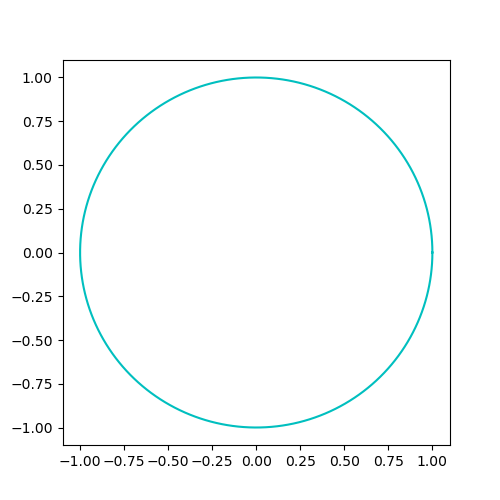

In [36]:
ax = plot_unit_circle()

The following two functions plot the action of a $2\times 2$ matrix on each point of our unit circle (`plot_ellipse`), as well as for a given 2D point (`plot_point_transformation`).

In [37]:
def plot_ellipse(matrix, ax=None):
    """Plot how a given `matrix` transforms the unit circle."""
    # if no plot is given, create a new one
    if ax is None:
        fig, ax = plt.subplots()
        fig.set(figwidth=5, figheight=5)

    circle = _get_circle()

    # this line computes the matrix-vector product for each of the points making up the circle:
    ellipse = matrix @ circle

    ax.plot(ellipse[0], ellipse[1], ls="--", color="k")

    limit = max(np.max(abs(ellipse)), np.max(abs(circle))) * 1.1
    ax.set(xlim=[-limit, limit], ylim=[-limit, limit])

    return ax


def plot_point_transformation(point, matrix, ax=None, marker="o"):
    """Plot the action of `matrix` on a single `point`."""
    if ax is None:
        fig, ax = plt.subplots()
        fig.set(figwidth=5, figheight=5)
    ax.plot(*point, ls="none", marker=marker, color="c")
    ax.plot(*(matrix @ point), ls="none", marker=marker, color="k")

In [38]:
# two more matrices
B = np.array(
    [[np.cos(np.pi / 3), -np.sin(np.pi / 3)], [np.sin(np.pi / 3), np.cos(np.pi / 3)]]
)
C = np.array([[2, 1], [0, 1]])

In [39]:
# TODO: Space for your code (task b): Add more matrices as described below.
# the resulting ellipse should have double the area of the unit circle
D = np.array([[1, 0], [0, 2]])

# rotate the unit circle by 45° counter-clockwise
degree_45 = np.pi / 4
E = np.array([[np.cos(degree_45), -np.sin(degree_45)], [np.sin(degree_45), np.cos(degree_45)]])

# map the unit circle to a line
F = np.array([[1, -1], [1, -1]])

# map the unit circle to a single point
G = np.array([[1, 1], [1, 1]])

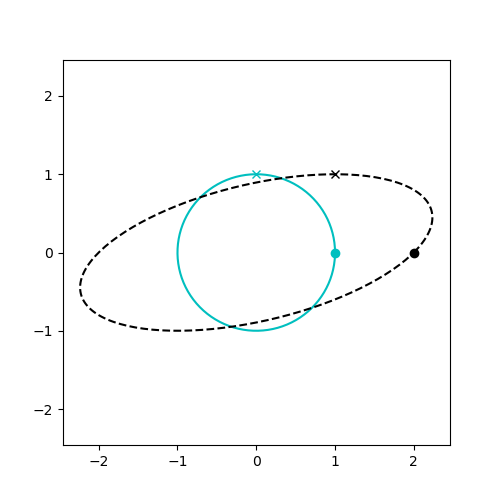

In [40]:
# matrix = A  # TODO (task a): change the matrix here
matrix = C

plt.close("all")

ax = plot_unit_circle()
plot_ellipse(matrix, ax)

plot_point_transformation(np.array([1, 0]), matrix, ax, marker="o")
plot_point_transformation(np.array([0, 1]), matrix, ax, marker="x")

**a)** Test the different matrices already provided above. What is the effect of each of them?

**b)** Add your own matrices above which have the following effects:
- the resulting ellipse should have double the area of the unit circle
- rotate the unit circle by 45° counter-clockwise
- map the unit circle to a line
- map the unit circle to a single point

*Space for your answer to task (a)*

Matrix A: A is an identity matrix. There's no effect on the original vectors.

Matrix B: The vectors have an anticlockwise rotation by $60 \degree$.

Matrix C: The x-coordinates of vectors are stretched by 2. The y-coordinates are sheared to right by $45 \degree$.

## Eigenvalues and Eigenvectors

For real, symmetric matrices $A\in\mathbb{R}^{n\times n}, A=A^T$, the eigenvalues and eigenvectors will be real and appear in the visualization from above.
We can compute both using NumPy, with the function `np.linalg.eig()`:

In [41]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[1. 1.]
[[1. 0.]
 [0. 1.]]


**c)** Use NumPy to numerically show for a random matrix that 
- the determinant of a matrix is equal to the product of its eigenvalues and
- the trace of a matrix is equal to the sum of its eigenvalues.

> **Hint:** Use the following functions: `np.linalg.random.rand()`, `np.linalg.det()`, `np.sum()`, `np.prod()`, `np.diag()`. You can search the [NumPy documentation](https://numpy.org/doc/stable/reference) to get an explanation and examples for each of them.

**d)** Create a random, **symmetric** $2\times 2$ matrix $R$ in the code box below. The code will visualize the effect a matrix has on its eigenvectors. Explain what you see in the text box below.

1. $det(A) = \lambda_1 \lambda_2 ... \lambda_n$
2. $trace(A) = \lambda_1 + \lambda_2 + ... + \lambda_n$

In [42]:
# TODO: Add your code for task (c)
dimension = np.random.randint(2, 5)
A = np.random.rand(dimension, dimension)
eigenvalues = np.linalg.eigvals(A)

det = np.linalg.det(A)
product_eigenvalues = np.prod(eigenvalues)
trace = np.trace(A)
sum_eigenvalues = np.sum(eigenvalues)

print("Matrix A:", A)
print("determinant:", det)
print("product of eigenvalues:", product_eigenvalues)
print("trace:", trace)
print("sum of eigenvalues:", sum_eigenvalues)

Matrix A: [[0.30089463 0.3352061  0.1057025 ]
 [0.73299695 0.23980645 0.008698  ]
 [0.38166489 0.75175148 0.6362058 ]]
determinant: -0.06269637599965087
product of eigenvalues: -0.06269637599965089
trace: 1.1769068745122406
sum of eigenvalues: 1.1769068745122402


Matrix: [[0.00718786 0.05776673]
 [0.05776673 0.73573812]]
eigenvalues: [0.00263598 0.74029   ]
eigenvectors: [[-0.99690985 -0.07855415]
 [ 0.07855415 -0.99690985]]


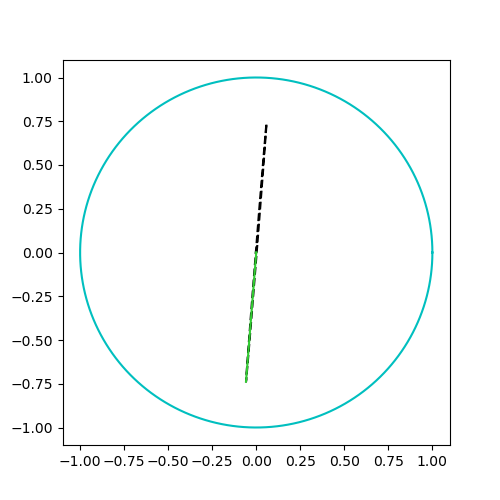

In [43]:
# Code for subtask (d)
R = np.random.rand(2, 2)  # TODO change this!
R[0][1] = R[1][0]
evalues, evectors = np.linalg.eig(R)
print("Matrix:", R)
print("eigenvalues:", evalues)
print("eigenvectors:", evectors)

ax = plot_unit_circle()
plot_ellipse(R, ax)

origin = np.array([0, 0])
colors = ["forestgreen", "limegreen"]
for index, evector in enumerate(evectors.T):
    evalue = evalues[index]
    ax.plot(
        [origin[0], evalue * evector[0]],
        [origin[1], evalue * evector[1]],
        color=colors[index],
    )

*Space for your answer to task (d)*

What can we see in the text box above:

- The circle transformed to an ellipse.
- The two eigenvectors are orthogonal. They are aligned to the minor and major axes respectively.
- The eigenvalues are the lengths of semi-minor and semi-major axes.

## Task 2: Tangent Planes, Approximating Derivatives

In this task, we build a small tool to compute and visualize approximate tangent planes for 2D scalar fields $f: \mathbb{R}^2\to\mathbb{R}$.
We begin with the quadratic function given by
$$
f(x, y) = 2x^2 - 3xy + 8y^2 + 2x - 4y + 4.
$$

**a)** Finish the implementation of the Python function `quadratic_function(x, y)` which computes the above function:

In [44]:
def quadratic_function(x, y):
    return 2 * (x ** 2) - 3 * x * y + 8 * (y ** 2) + 2 * x - 4 * y + 4  # TODO add your code here

The following Python function creates a 3D plot for scalar fields as $f(x)$ / `quadratic_function` above:

In [8]:
def plot_scalar_field(func, x_lim=(-5, 5), y_lim=(-5, 5), fig=None, ax=None):
    """Create a surface plot for a scalar field."""

    # x_lim and y_lim are contain the minimal and maximal values for x and y
    # generate equidistant points from the minimal to the maximal values for x and y:
    x = np.linspace(x_lim[0], x_lim[1], 100)
    y = np.linspace(y_lim[0], y_lim[1], 100)
    x, y = np.meshgrid(x, y)

    if fig is None or ax is None:
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Evaluate the function in every (x, y) point and plot it
    ax.plot_surface(x, y, func(x, y))

    # Add plot labels
    ax.set(
        xlabel="x",
        ylabel="y",
        zlabel="f(x,y)",
    )
    return fig, ax

**b)** Call `plot_scalar_field()` for the quadratic function above. Try changing `x_lim` and `y_lim` to plot the function on different intervals.

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='f(x,y)'>)

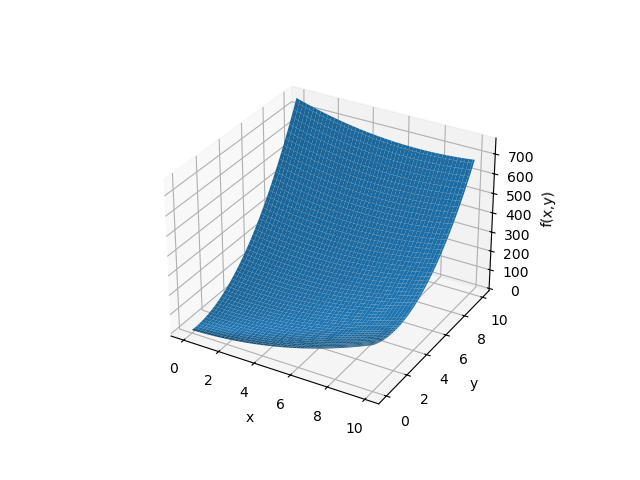

In [46]:
# TODO: Space for your code
plot_scalar_field(quadratic_function, x_lim=(0, 10), y_lim=(0, 10))

> **Note:** You can zoom, rotate, and move these 3D plots interactively!
> 
> If you are using Google Colab (where the interactive plots do not work), you can do the following instead:

```python
fig, ax = plot_scalar_field(...)
ax.view_init(30, 30) # <- change the two angles in here to rotate the plot
```

For a given scalar field, we can also derive the function which gives the associated tangent plane. Using the components of the gradient
$$
\nabla f = \begin{pmatrix}f_x \\ f_y\end{pmatrix},
$$
we can write down the function for the tangent plane in a given point $(x_0, y_0)$ as $t:\mathbb{R}^2\to\mathbb{R}$, $(x,y)\mapsto t(x, y)$, with
$$
t(x, y) = f(x_0, y_0) + f_x(x_0, y_0) \cdot (x-x_0) + f_y(x_0, y_0) \cdot (y-y_0).
$$
Let us try this for the quadratic function given above:

**c)** Finish the implementation of `exact_gradient()` below.

In [47]:
def exact_gradient(x, y):
    # TODO: Derive f_x and f_y explicitly for the quadratic function given above and store them in variables f_x, f_y
    f_x = 4 * x - 3 * y + 2
    f_y = -3 * x + 16 * y - 4
    return np.array([f_x, f_y])


def exact_tangent_plane(x_0, y_0):
    f = quadratic_function(x_0, y_0)
    f_x, f_y = exact_gradient(x_0, y_0)
    t = lambda x, y: f + f_x * (x - x_0) + f_y * (y - y_0)
    return t

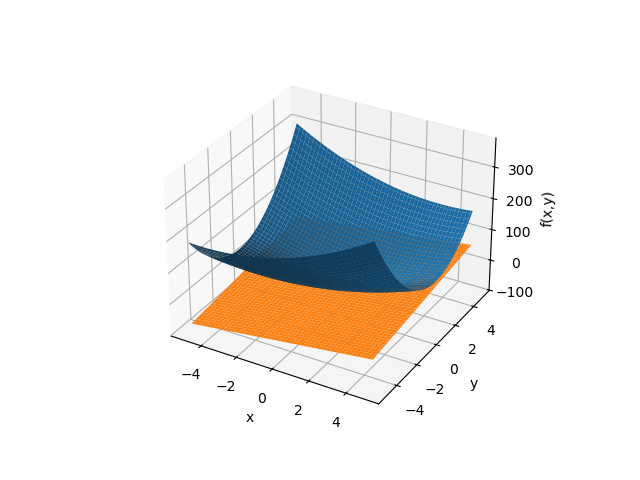

In [48]:
# plot the quadratic function f
fig, ax = plot_scalar_field(quadratic_function)

# Create the tangent plane function for a given point x_0, y_0
x_0, y_0 = 2, 1
t = exact_tangent_plane(x_0, y_0)

# plot the tangent plane into the same figure
plot_scalar_field(t, fig=fig, ax=ax)

# Add the point f(x_0, y_0) that we used to derive t
ax.scatter(x_0, y_0, quadratic_function(x_0, y_0), color="red");

**d)** Show using the functions from above that the gradient at the global minimum of $f$ is 0. What does this mean for the tangent plane at that point?

In [49]:
# TODO: Space for your code.
# 1. find the global minimum point (a,b) of f
a, b = - 4 / 11, 2 / 11
# 2. calculate the exact gradient of (a,b)
gradient = exact_gradient(a, b)
print(gradient)

[0. 0.]


*Space for your answer.*

The gradient is $\vec 0$ means that the normal vector of the tangent plane is parallel to the z-axis and the tangent plane is horizonal.

The approach from above required us to provide the gradient for our quadratic function $f$. We now want to make our code more versatile, by **approximating** the gradient for a given function. For this we use the following approach:

$$
\nabla f = \begin{pmatrix}f_x \\ f_y\end{pmatrix} \approx \begin{pmatrix} \frac{f(x+h,y)-f(x,y)}{h} \\ \frac{f(x,y+h)-f(x,y)}{h}\end{pmatrix},
$$

with $h>0$ small.

Let's create two functions to compute the approximate partial derivatives $f_x, f_y$:

**e)** Finish the implementation for `partial_derivative_y()` below.

In [50]:
def partial_derivative_x(f):
    return lambda x, y, h=1e-8: (f(x + h, y) - f(x, y)) / h


def partial_derivative_y(f):
    # TODO: create a second function partial_derivative_y that computes the analogous approximation for f_y
    return lambda x, y, h=1e-8: (f(x, y + h) - f(x, y)) / h

The approximate gradient and tangent planes are then given by:

In [51]:
def gradient(f):
    """Create new function for an R^2 -> R function that approximates its gradient."""
    gradient = lambda x, y, h=1e-8: np.array(
        [partial_derivative_x(f)(x, y, h), partial_derivative_y(f)(x, y, h)]
    )
    return gradient


def tangent_plane(f, x_0, y_0, h=1e-8):
    """Create new function that gives an approximate tangent plane for an R^2 -> R function at (x_0, y_0)"""
    f_x = partial_derivative_x(f)(x_0, y_0, h)
    f_y = partial_derivative_y(f)(x_0, y_0, h)
    t = lambda x, y: f(x_0, y_0) + f_x * (x - x_0) + f_y * (y - y_0)
    return t

Let us try this for the quadratic function given above:

**f)** Finish the code snippet below to plot the approximate tangent plane.

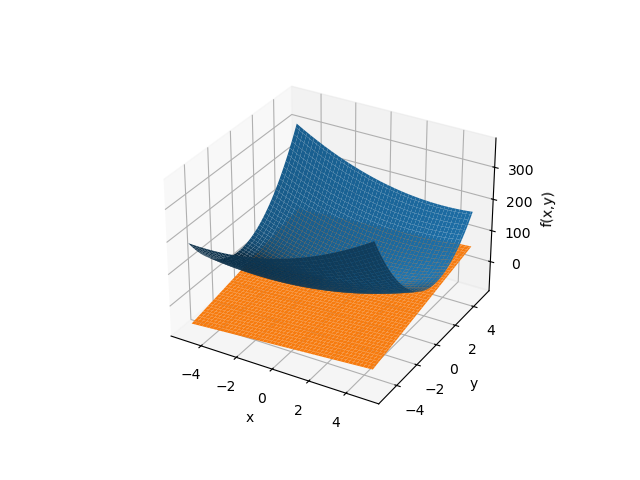

In [52]:
# plot the quadratic function f
fig, ax = plot_scalar_field(quadratic_function)

# Create the *approximate* tangent plane function for f at x_0, y_0
x_0, y_0 = 1.2, 1
# TODO: Create t_approx using the tangent_plane function above
t_approx = tangent_plane(quadratic_function, x_0, y_0, h=1e-2)

# plot the tangent plane into the same figure
plot_scalar_field(t_approx, fig=fig, ax=ax)

# Add the point f(x_0, y_0) that we used to derive t
ax.scatter(x_0, y_0, quadratic_function(x_0, y_0), color="red")

**g)** How does this result compare to the exact tangent plane we plotted before? Try making the step size $h$ larger. How does this affect the result? (For example `tangent_plane(f, x_0, y_0, h=1e-2)` for $h=10^{-2}$)

In [53]:
exact = exact_gradient(x_0, y_0)
approximate_1 = gradient(quadratic_function)(x_0, y_0, h=1e-8)
approximate_2 = gradient(quadratic_function)(x_0, y_0, h=1e-2)
approximate_3 = gradient(quadratic_function)(x_0, y_0, h=1e-1)

print(exact)
print(approximate_1)
print(approximate_2)
print(approximate_3)

[3.8 8.4]
[3.80000014 8.39999998]
[3.82 8.48]
[4.  9.2]


*Space for your comments & observations*

As the $h$ being larger, the difference between exact gradient and approximate gradient became larger as well. The result became more inaccurate.

The power of the approximate `tangent_plane` function is that we can reuse it for other functions without explicitly providing the gradient. Here are two other scalar fields:

In [54]:
def rosenbrock(x, y):
    a = 1
    b = 100
    return (a - x) ** 2 + b * (y - x**2) ** 2


def sin_sqrt(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

**h)** Plot the Rosenbrock and `sin_sqrt` functions, along with a tangent plane.

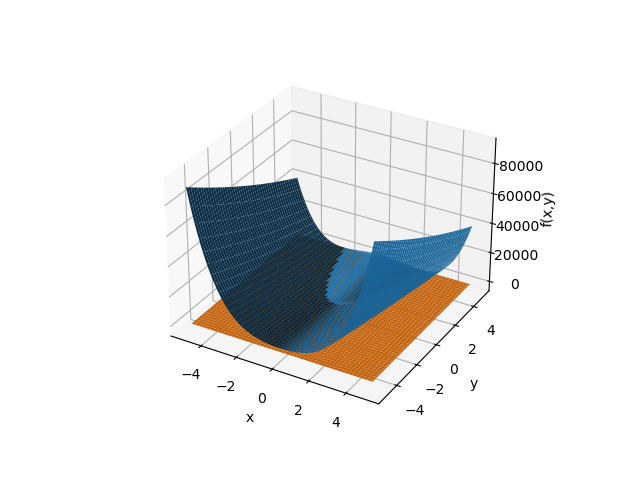

In [55]:
# TODO: Plot the Rosenbrock function, along with a tangent plane.
fig, ax = plot_scalar_field(rosenbrock)

x_1, y_1 = 1, 1
t_approx_rosenbrock = tangent_plane(rosenbrock, x_1, y_1, h=1e-8)

plot_scalar_field(t_approx_rosenbrock, fig=fig, ax=ax)

ax.scatter(x_1, y_1, rosenbrock(x_1, y_1), color="red")

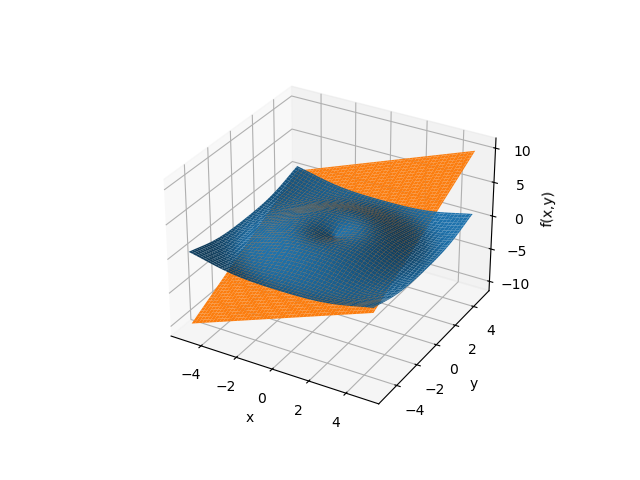

In [56]:
# TODO: Plot the sin_sqrt function, along with a tangent plane.
fig, ax = plot_scalar_field(sin_sqrt)

# x_2, y_2 = np.pi / 2, 0
x_2, y_2 = 0, 0
t_approx_sin_sqrt = tangent_plane(sin_sqrt, x_2, y_2, h=1e-8)

plot_scalar_field(t_approx_sin_sqrt, fig=fig, ax=ax)

ax.scatter(x_2, y_2, sin_sqrt(x_2, y_2), color="red")

Try in particular the points $(1,1)$ for the Rosenbrock function and $(\pi/2, 0)$, $(0,0)$ for $\sin(\sqrt{x^2+ y^2})$. What do you observe?

*Space for your comments & observations*

At $(1, 1)$ for the rosenbrock function and $(\pi/2, 0)$ for the sin_sqrt function, the tangent planes are horizonal.

At $(0, 0)$ for the sin_sqrt function, the exact gradient actually doesn't exist.
The approximate gradient came from the given directions along x-axis and y-axis, which made the partial w.r.t x and partial w.r.t y have the same approximate value 1.
So the approximate tangent plane has a normal vector (1, 1, -1).

## Task 3: Optimization, Multivariate Calculus

In this task we will be studying Himmelblau's function, which is defined as $$\begin{equation} f(x,y) = (x^2 + y - 11)^2 + (x +y^2 - 7)^2. \end{equation} $$ In the cells below you can find code that plots the contour map of Himmelblau's function. 

**a)** Use the plot to determine the number of maximums and minimums graphically.

In [1]:
def himmelblau(x, y):
    return (x**2 + y - 11) ** 2 + (x + y**2 - 7) ** 2

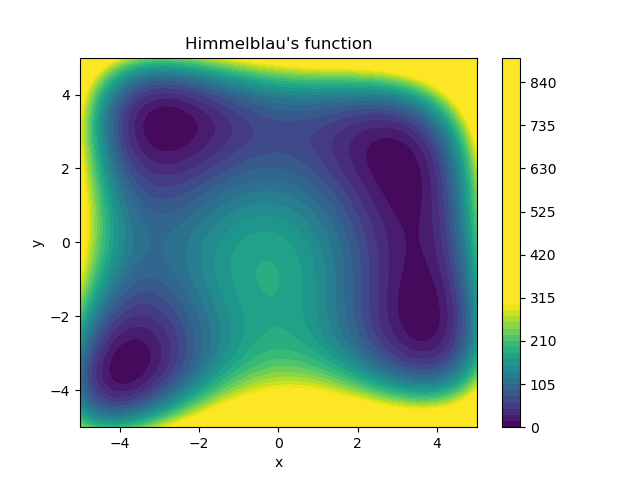

In [7]:
v = np.linspace(-5, 5, 100)
x, y = np.meshgrid(v, v)

fig, ax = plt.subplots()
im = ax.contourf(x, y, himmelblau(x, y), 60, vmax=300.0, vmin=0.0)
fig.colorbar(im)
ax.set(
    xlabel="x",
    ylabel="y",
    title="Himmelblau's function",
);

*Space for your answer*

There are 4 locally minimum points and 1 locally maximum point.

**b)** Reuse `plot_scalar_field()` from Task 2 to plot Himmelblau's function in 3D

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='f(x,y)'>)

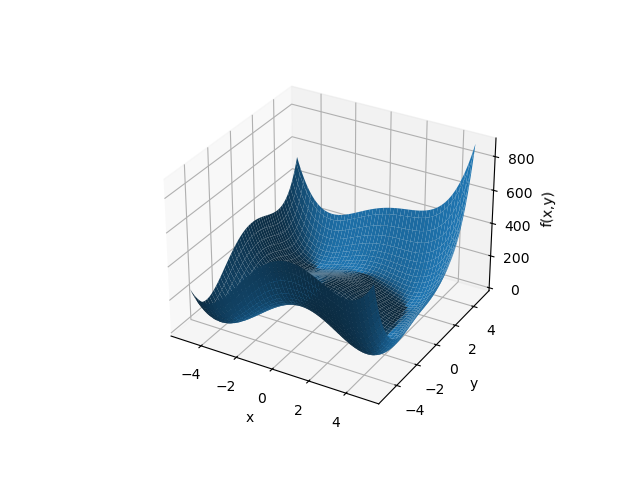

In [9]:
# TODO: Space for your code
plot_scalar_field(himmelblau)

We are now going to study a simple optimizing algorithm called Gradient descent. The idea behind the algorithm is to take a small step in the negative direction of the gradient or in the direction of the steepest descent, resulting in the following algorithm
$$x^{k+1} = x^k - \alpha \nabla f(x^k),$$
where $\alpha$ is a small value. The following performs 20 steps of the gradient descent algorithm and plots the steps with red x's in the contour plot of f.

Final value: x=3.5844372876153425, y=-1.848224556706429


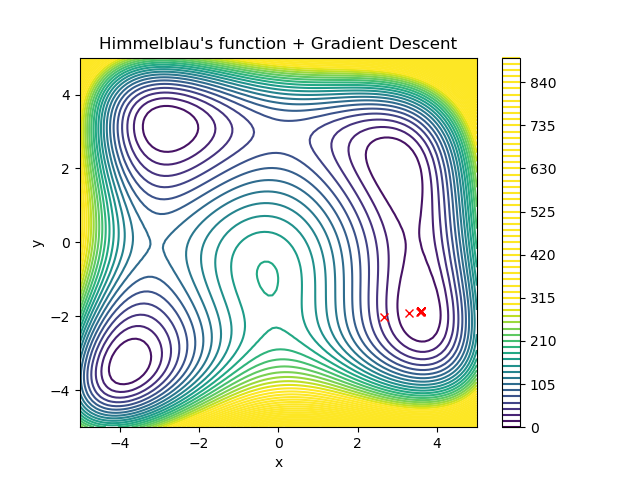

In [11]:
def grad_himmelblau(x, y):
    x_out = 2 * (-7 + x + y**2 + 2 * x * (-11 + x**2 + y))
    y_out = 2 * (-11 + x**2 + y + 2 * y * (-7 + x + y**2))
    return (x_out, y_out)


# Create a contour plot of the function
v = np.linspace(-5, 5, 100)
x, y = np.meshgrid(v, v)
fig, ax = plt.subplots()
im = ax.contour(x, y, himmelblau(x, y), 60, vmax=300.0, vmin=0.0)
fig.colorbar(im)
ax.set(xlabel="x", ylabel="y", title="Himmelblau's function + Gradient Descent")

# the starting values for the Gradient descent algorithm
# x = 0.0
# y = 0.0
x = 2.0
y = -4.0


# Controls the size of the step that gradient descent does in each iteration
alpha = 0.01

# Do 20 iterations or steps of gradient descent
for k in range(20):
    # Calculate the gradient of the current step
    x_update, y_update = grad_himmelblau(x, y)

    # update x and y by taking a small step in direction of the negative gradient
    x = x - alpha * x_update
    y = y - alpha * y_update

    # add the point to the plot
    plt.plot(x, y, "rx")

print(f"Final value: {x=}, {y=}")

> **Note:** Here you can clearly see that the gradient is either zero or perpendicular to the level sets (isolines) of a function.

**c)** Has Gradient descent found a minimum?

*Space for your answer*

Yes, it has.

**d)** Change the starting values for gradient descent in the code above to $x = 0.2,y = -4.0$. Can you explain the result?

*Space for your answer*

The Gradient descent found another minimum other than the previous one. This algorithm finds the nearest locally minimum from the original starting point.

**e)** What would happen if you change the algorithm to
$$x^{k+1} = x^k + \alpha \nabla f(x^k)?$$
Will it still find local minima?

*Space for your answer*

- If $\alpha$ is a small positive value, this algorithm will finally find local maxima.
- If $\alpha$ is a small negative value, it will still find local minima.